In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/Training Data - Recruitments 2024 - GPL Prediction - Training Data.csv")

### First look at the data:

In [2]:
df

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA-2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
0,male,19.0,BITSAT,8.85,7.0,NaN,CBSE,12,4/22/2005,4,YES,NO,LITE,20495,5.00,NO
1,female,21.0,DASA,7.01,9.0,NaN,ICSE,1,8/8/2003,1,YES,NO,GHOT,2361,0.20,YES
2,female,20.0,BITSAT,3.00,8.0,NaN,CBSE,5,5/5/2004,4,YES,NO,GHOT,8548,0.30,YES
3,female,NaN,DASA,NaN,NaN,NaN,CBSE,7,10/6/2003,4,YES,NO,GHOT,4086,0.20,YES
4,male,21.0,BITSAT,5.65,9.0,NaN,CBSE,7,3/15/2003,3,YES,NO,LITE,13767,8.50,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,male,19.0,BOARD TOPPER,6.02,3.0,NaN,CBSE,6,7/16/2005,0,NO,NO,GHOT,13166,3.90,NO
1095,female,24.0,BOARD TOPPER,3.57,6.0,NaN,CBSE,5,2/3/2000,2,NO,NO,GHOT,5619,0.30,YES
1096,female,21.0,BITSAT,3.71,5.0,Gaming Club,CBSE,0,4/12/2003,4,NO,YES,LITE,17559,5.40,NO
1097,male,22.0,DASA,9.68,5.0,NaN,CBSE,3,4/25/2002,3,NO,NO,GHOT,16411,8.70,NO


Checking Column names and datatypes:

In [3]:
df.dtypes

SEX                               object
 AGES                            float64
ADMISSION MODE                    object
CGPA - 1                         float64
CGPA-2                           float64
 CLUB / DEPARTMENT                object
BOARD STUDIED                     object
DAYS SINCE LAST SHOWER             int64
BIRTHDAY                          object
TREATS GIVEN                       int64
 HAS A S/O ?                      object
ATTENDS LECTURES                  object
CHARACTER                         object
PIZZERIA EXPENDITURE (annual)      int64
GRAMS / MONTH                    float64
GPL                               object
dtype: object

##### Removing those annoying inconsitent spaces in column names for my sanity:

In [4]:
df = df.rename(columns={" AGES":"AGES", "CGPA-2":"CGPA - 2", " HAS A S/O ?": "HAS A S/O ?", " CLUB / DEPARTMENT": "CLUB / DEPARTMENT"})


### Finding columns with missing values:

In [5]:
df.isnull().sum()

SEX                                 0
AGES                               23
ADMISSION MODE                      0
CGPA - 1                           10
CGPA - 2                            8
CLUB / DEPARTMENT                1014
BOARD STUDIED                       0
DAYS SINCE LAST SHOWER              0
BIRTHDAY                            0
TREATS GIVEN                        0
HAS A S/O ?                         0
ATTENDS LECTURES                    0
CHARACTER                           0
PIZZERIA EXPENDITURE (annual)       0
GRAMS / MONTH                       0
GPL                                 0
dtype: int64

##### Converting Birthday to datetime:

In [6]:
df['BIRTHDAY'] = df['BIRTHDAY'].apply(pd.to_datetime)
df['BIRTHDAY'].isnull().any()
#  no nulls :)

False

#### Imputing missing values for ages and CGPAs:

In [7]:
# Checking whether there are any rows where difference between 2024 and birth year is not equal to age
df.loc[(df['AGES'].notnull()) & (df['AGES'] != 2024-df['BIRTHDAY'].dt.year)]

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA - 2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL


##### Since age has so far always been equal to difference between current year and birth year in this dataset, we can impute missing age values in this way

In [8]:
df['AGES'] = df['AGES'].fillna(2024-df['BIRTHDAY'].dt.year)

In [9]:
df['CGPA - 1'] = df['CGPA - 1'].fillna(df['CGPA - 1'].median())
df['CGPA - 2'] = df['CGPA - 2'].fillna(df['CGPA - 2'].median())

### Getting a feel for numeric data:

In [10]:
def plotDistribution(column, bins=-1):
    if(bins==-1):
        df[column].hist()
    else:
        df[column].hist(bins= bins)
    plt.xlabel(column)
    plt.ylabel("FREQUENCY")
    plt.title("{} DISTRIBUTION".format(column))

<Axes: xlabel='AGES'>

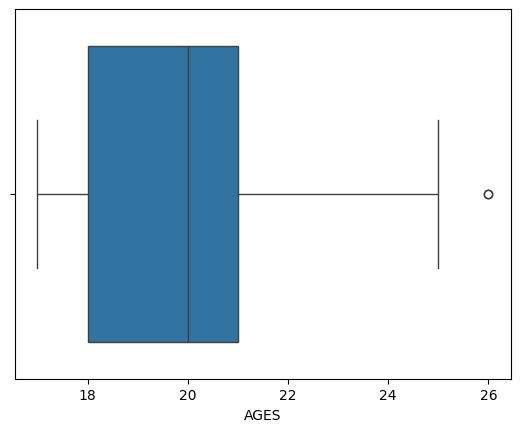

In [11]:
# plotDistribution("AGES")
sns.boxplot(data=df, x='AGES')

##### Age outlier, finding rows where age > 24 to be safe:

In [12]:
df.loc[df['AGES']>24]
# Only 1 26 year old, dropping that record
df = df.drop(df[df['AGES']==26].index)
df.loc[df['AGES']>24]

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA - 2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
94,male,25.0,DASA,6.90,7.0,NaN,ICSE,2,1999-09-21,1,NO,NO,LITE,17329,2.4,NO
114,male,25.0,BITSAT,7.94,3.0,NaN,Other,4,1999-12-20,2,NO,NO,LITE,11454,10.9,NO
487,male,25.0,DASA,5.77,5.0,NaN,ICSE,14,1999-08-11,2,NO,NO,LITE,20209,9.9,NO
666,male,25.0,BOARD TOPPER,3.00,5.0,NaN,CBSE,3,1999-10-16,1,NO,NO,LITE,14527,9.0,NO
738,male,25.0,DASA,7.97,6.0,NaN,CBSE,10,1999-05-27,4,NO,YES,LITE,12470,2.6,NO
843,male,25.0,BITSAT,7.03,4.0,NaN,CBSE,5,1999-01-20,1,NO,NO,LITE,16599,9.5,NO
964,male,25.0,DASA,5.14,3.0,NaN,CBSE,10,1999-08-03,4,NO,NO,LITE,17161,6.6,NO


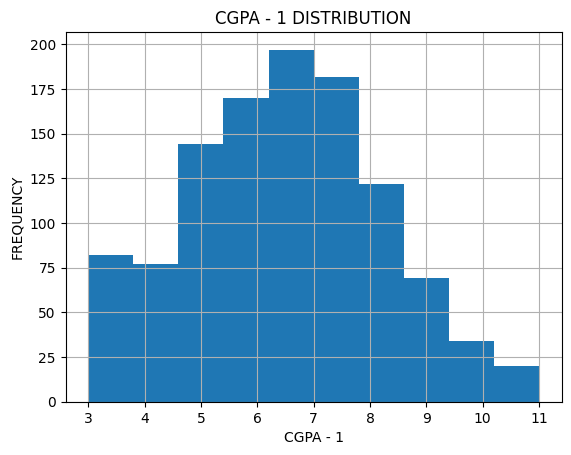

In [13]:
plotDistribution("CGPA - 1")

Wait some have more than 10 CGPA wtf

In [14]:
df.loc[df['CGPA - 1'] > 10]

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA - 2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
13,male,21.0,BITSAT,10.12,7.0,NaN,CBSE,1,2003-09-23,0,NO,YES,LITE,18402,10.90,NO
167,male,20.0,BITSAT,11.00,7.0,NaN,CBSE,3,2004-05-13,0,YES,NO,LITE,19147,1.90,NO
175,female,23.0,DASA,10.51,9.0,NaN,ICSE,3,2001-05-19,0,YES,NO,LITE,18793,7.30,NO
197,male,20.0,BITSAT,11.00,8.0,NaN,CBSE,4,2004-03-25,2,NO,NO,LITE,19476,4.80,NO
200,male,19.0,BITSAT,10.42,7.0,NaN,CBSE,0,2005-03-10,0,NO,NO,GHOT,3466,0.30,YES
312,female,20.0,BOARD TOPPER,10.68,7.0,NaN,CBSE,5,2004-12-13,3,YES,NO,GHOT,6060,0.25,YES
362,female,17.0,BITSAT,11.00,7.0,NaN,ICSE,10,2007-09-28,3,NO,NO,GHOT,6814,0.30,YES
396,female,19.0,BITSAT,10.22,7.0,NaN,CBSE,1,2005-09-27,4,YES,NO,LITE,17786,1.90,NO
421,female,19.0,BOARD TOPPER,11.00,8.0,NaN,CBSE,5,2005-08-26,4,YES,NO,GHOT,8364,0.30,YES
478,male,20.0,DASA,10.42,9.0,NaN,ICSE,9,2004-01-22,4,NO,NO,GHOT,4851,0.50,YES


Setting those cases to 10

In [15]:
df.loc[df['CGPA - 1'] > 10, 'CGPA - 1'] = 10;
df['CGPA - 1'].max()

10.0

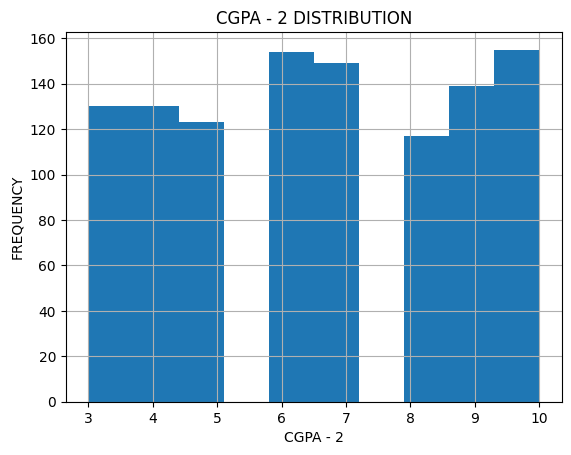

In [16]:
plotDistribution("CGPA - 2")

Not sure about the random gaps between 5,6 and 7,8

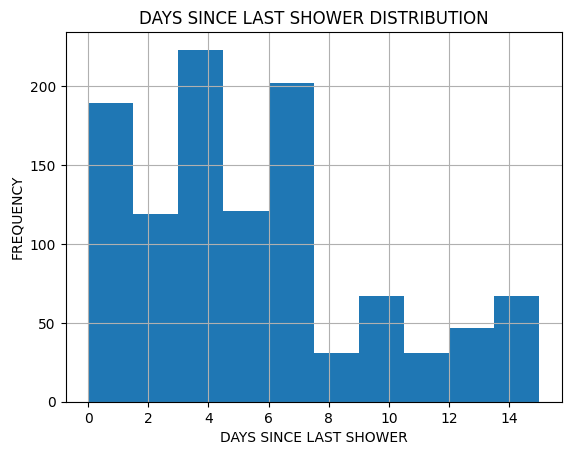

In [17]:
plotDistribution("DAYS SINCE LAST SHOWER")

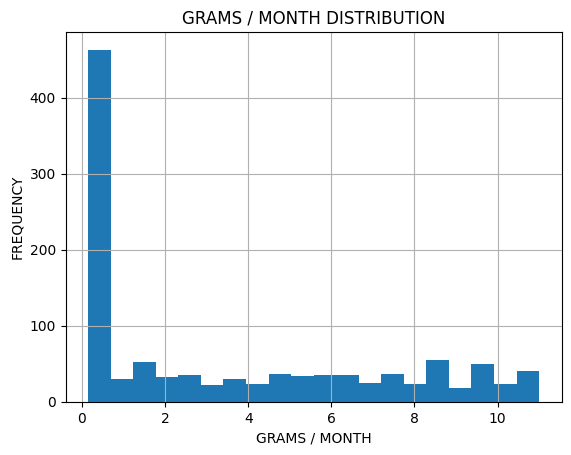

In [18]:
plotDistribution("GRAMS / MONTH", bins=20)

<Axes: xlabel='PIZZERIA EXPENDITURE (annual)'>

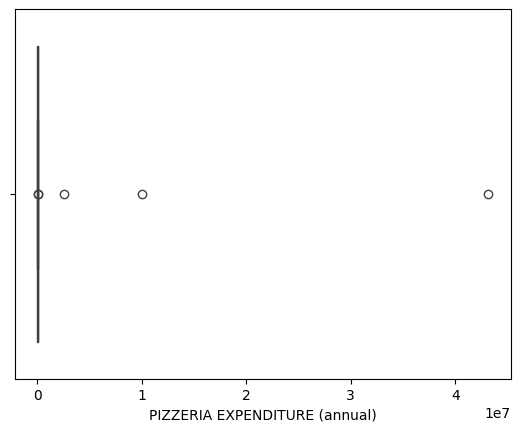

In [19]:
sns.boxplot(data=df, x='PIZZERIA EXPENDITURE (annual)')

Expenditure outliers, just dropping all where expense > 30000

In [20]:
df['PIZZERIA EXPENDITURE (annual)'].sort_values().tail(10)
# Just dropping those columns 
df = df.drop(df[df['PIZZERIA EXPENDITURE (annual)'] > 30000].index)


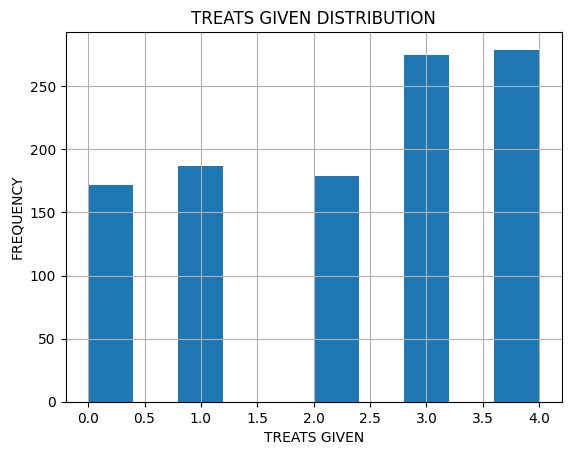

In [21]:
plotDistribution("TREATS GIVEN")

### Fixing some columns:

#### Checking for categorical data:

In [22]:
df['ADMISSION MODE'].unique()
df['ATTENDS LECTURES'].unique() #tobool
df['BOARD STUDIED'].unique()
df['CHARACTER'].unique()
df['CLUB / DEPARTMENT'].unique() #fix
df['HAS A S/O ?'].unique() #tobool
df['SEX'].unique()

array(['male', 'female'], dtype=object)

##### Converting the columns that need no adjustments to category dtype

In [23]:
df['ADMISSION MODE'] = df['ADMISSION MODE'].astype("category")
df['CHARACTER'] = df['CHARACTER'].astype("category")
df['SEX'] = df['SEX'].astype('category')

#### Fixing certain columns:

Only 2 records where board studied is Invalid, and they both got GPL. Seems like a bad outlier

In [24]:
df.loc[df['BOARD STUDIED'] == 'Invalid']


,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA - 2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
60,female,21.0,DASA,6.96,4.0,NaN,Invalid,0,2003-05-07,2,YES,NO,GHOT,4481,0.30,YES
821,female,24.0,DASA,7.98,5.0,NaN,Invalid,7,2000-10-17,4,NO,NO,GHOT,7526,0.15,YES


In [25]:
# Dropping these records
df = df.drop(df[df['BOARD STUDIED']=='Invalid'].index)
df['BOARD STUDIED'] = df['BOARD STUDIED'].astype("category")

Clubs/Departments column has inconsistently spelled clubs. Upon finding unique values, it's seen that many of them are actually meant to be the same thing, but spelt weirdly. Correcting them here:

In [26]:
df["CLUB / DEPARTMENT"].unique()

array([nan, 'Mountaineering', 'Gaming Club', 'SuTT', 'Mountaneering',
       'DVm', 'DVM', 'SUTT', 'Gaing Clu', 'Mtaineering', 'SUTt',
       'Mountainring', 'Gaming', 'dv', 'moneering', 'VM', 'Mou', 'Gamub'],
      dtype=object)

In [27]:
df.loc[df['CLUB / DEPARTMENT'] == 'SUTt', 'CLUB / DEPARTMENT'] = "SUTT"
df.loc[df['CLUB / DEPARTMENT'] == 'SuTT', 'CLUB / DEPARTMENT'] = "SUTT"

df.loc[df['CLUB / DEPARTMENT'] == 'DVm', 'CLUB / DEPARTMENT'] = "DVM"
df.loc[df['CLUB / DEPARTMENT'] == 'dv', 'CLUB / DEPARTMENT'] = "DVM"
df.loc[df['CLUB / DEPARTMENT'] == 'VM', 'CLUB / DEPARTMENT'] = "DVM"

df.loc[df['CLUB / DEPARTMENT'] == 'Mountaneering', 'CLUB / DEPARTMENT'] = "Mountaineering"
df.loc[df['CLUB / DEPARTMENT'] == 'Mtaineering', 'CLUB / DEPARTMENT'] = "Mountaineering"
df.loc[df['CLUB / DEPARTMENT'] == 'Mountainring', 'CLUB / DEPARTMENT'] = "Mountaineering"
df.loc[df['CLUB / DEPARTMENT'] == 'moneering', 'CLUB / DEPARTMENT'] = "Mountaineering"
df.loc[df['CLUB / DEPARTMENT'] == 'Mou', 'CLUB / DEPARTMENT'] = "Mountaineering"

df.loc[df['CLUB / DEPARTMENT'] == 'Gaing Clu', 'CLUB / DEPARTMENT'] = "Gaming Club"
df.loc[df['CLUB / DEPARTMENT'] == 'Gaming', 'CLUB / DEPARTMENT'] = "Gaming Club"
df.loc[df['CLUB / DEPARTMENT'] == 'Gamub', 'CLUB / DEPARTMENT'] = "Gaming Club"

# Adding None as club type for empty cases
df['CLUB / DEPARTMENT'] = df['CLUB / DEPARTMENT'].fillna('None')

df['CLUB / DEPARTMENT'] = df['CLUB / DEPARTMENT'].astype('category')
df["CLUB / DEPARTMENT"].unique()

['None', 'Mountaineering', 'Gaming Club', 'SUTT', 'DVM']
Categories (5, object): ['DVM', 'Gaming Club', 'Mountaineering', 'None', 'SUTT']

Has S/O column has Yes/NO/FALSE values, casting to boolean

In [28]:
df['HAS A S/O ?'].unique()

array(['YES', 'NO', 'FALSE'], dtype=object)

In [29]:
df.loc[df['HAS A S/O ?'] == "FALSE", "HAS A S/O ?"] = False
df.loc[df['HAS A S/O ?'] == "NO", "HAS A S/O ?"] = False
df.loc[df['HAS A S/O ?'] == "YES", "HAS A S/O ?"] = True
df['HAS A S/O ?'].unique()
df['HAS A S/O ?'] = df['HAS A S/O ?'].astype('bool')
df['HAS A S/O ?'].dtype

dtype('bool')

Same for attends lectures

In [30]:
df.loc[df['ATTENDS LECTURES'] == 'YES', 'ATTENDS LECTURES'] = True
df.loc[df['ATTENDS LECTURES'] == 'NO', 'ATTENDS LECTURES'] = False
df['ATTENDS LECTURES']=df['ATTENDS LECTURES'].astype("bool")
df['ATTENDS LECTURES'].dtype

dtype('bool')

...And for GPL

In [31]:
df.loc[df['GPL'] == 'YES', 'GPL'] = True
df.loc[df['GPL'] == 'NO', 'GPL'] = False
df['GPL'] = df['GPL'].astype('bool')
df['GPL'].dtype

dtype('bool')

Dropping Birthday column entirely since its no longer relevant

In [32]:
df = df.drop('BIRTHDAY', axis=1)

In [33]:
df.to_csv("../data/clean.csv", encoding="utf-8", index=False)

### One-hot encoding:

In [34]:
admissionConverted = pd.get_dummies(df['ADMISSION MODE'], drop_first=True)
boardConverted = pd.get_dummies(df['BOARD STUDIED'], drop_first=True)
characterConverted = pd.get_dummies(df['CHARACTER'], drop_first=True)
sexConverted = pd.get_dummies(df['SEX'], drop_first=True)
clubConverted = pd.get_dummies(df['CLUB / DEPARTMENT']).drop('SUTT', axis=1)

df = pd.concat([sexConverted, df['AGES'], admissionConverted, df['CGPA - 1'], df['CGPA - 2'], 
           clubConverted, boardConverted, df['DAYS SINCE LAST SHOWER'], df['TREATS GIVEN'], 
           df['HAS A S/O ?'], df['ATTENDS LECTURES'], characterConverted, df['PIZZERIA EXPENDITURE (annual)'], 
           df['GRAMS / MONTH'], df['GPL']], axis=1)

for col in list(df.columns):
    df[col] = df[col].astype('float32')

df.dtypes


male                             float32
AGES                             float32
BOARD TOPPER                     float32
DASA                             float32
CGPA - 1                         float32
CGPA - 2                         float32
DVM                              float32
Gaming Club                      float32
Mountaineering                   float32
None                             float32
ICSE                             float32
Other                            float32
DAYS SINCE LAST SHOWER           float32
TREATS GIVEN                     float32
HAS A S/O ?                      float32
ATTENDS LECTURES                 float32
LITE                             float32
PIZZERIA EXPENDITURE (annual)    float32
GRAMS / MONTH                    float32
GPL                              float32
dtype: object

### Normalization:

Normalizing data since not all numeric types are Gaussian-like

In [35]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler()
scaler.fit(df)
joblib.dump(scaler, '../data/scaler.save')

cols = df.columns

df = pd.DataFrame(scaler.transform(df))
df.columns = cols
df



,male,AGES,BOARD TOPPER,DASA,CGPA - 1,CGPA - 2,DVM,Gaming Club,Mountaineering,None,ICSE,Other,DAYS SINCE LAST SHOWER,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,LITE,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
0,1.0,0.250,0.0,0.0,0.835714,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.800000,1.00,1.0,0.0,1.0,0.932069,0.447005,0.0
1,0.0,0.500,0.0,1.0,0.572857,0.857143,0.0,0.0,0.0,1.0,1.0,0.0,0.066667,0.25,1.0,0.0,0.0,0.103086,0.004608,1.0
2,0.0,0.375,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,1.00,1.0,0.0,0.0,0.385920,0.013825,1.0
3,0.0,0.500,0.0,1.0,0.492857,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.466667,1.00,1.0,0.0,0.0,0.181943,0.004608,1.0
4,1.0,0.500,0.0,0.0,0.378571,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.466667,0.75,1.0,0.0,1.0,0.624503,0.769585,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1.0,0.250,1.0,0.0,0.431429,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.400000,0.00,0.0,0.0,0.0,0.597029,0.345622,0.0
1086,0.0,0.875,1.0,0.0,0.081429,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.50,0.0,0.0,0.0,0.252023,0.013825,1.0
1087,0.0,0.500,0.0,0.0,0.101429,0.285714,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.00,0.0,1.0,1.0,0.797851,0.483871,0.0
1088,1.0,0.625,0.0,1.0,0.954286,0.285714,0.0,0.0,0.0,1.0,0.0,0.0,0.200000,0.75,0.0,0.0,0.0,0.745371,0.788018,0.0


### Final cleaned data:

In [36]:
df

,male,AGES,BOARD TOPPER,DASA,CGPA - 1,CGPA - 2,DVM,Gaming Club,Mountaineering,None,ICSE,Other,DAYS SINCE LAST SHOWER,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,LITE,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
0,1.0,0.250,0.0,0.0,0.835714,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.800000,1.00,1.0,0.0,1.0,0.932069,0.447005,0.0
1,0.0,0.500,0.0,1.0,0.572857,0.857143,0.0,0.0,0.0,1.0,1.0,0.0,0.066667,0.25,1.0,0.0,0.0,0.103086,0.004608,1.0
2,0.0,0.375,0.0,0.0,0.000000,0.714286,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,1.00,1.0,0.0,0.0,0.385920,0.013825,1.0
3,0.0,0.500,0.0,1.0,0.492857,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.466667,1.00,1.0,0.0,0.0,0.181943,0.004608,1.0
4,1.0,0.500,0.0,0.0,0.378571,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.466667,0.75,1.0,0.0,1.0,0.624503,0.769585,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1.0,0.250,1.0,0.0,0.431429,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.400000,0.00,0.0,0.0,0.0,0.597029,0.345622,0.0
1086,0.0,0.875,1.0,0.0,0.081429,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.50,0.0,0.0,0.0,0.252023,0.013825,1.0
1087,0.0,0.500,0.0,0.0,0.101429,0.285714,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.00,0.0,1.0,1.0,0.797851,0.483871,0.0
1088,1.0,0.625,0.0,1.0,0.954286,0.285714,0.0,0.0,0.0,1.0,0.0,0.0,0.200000,0.75,0.0,0.0,0.0,0.745371,0.788018,0.0


In [37]:
df.dtypes

male                             float32
AGES                             float32
BOARD TOPPER                     float32
DASA                             float32
CGPA - 1                         float32
CGPA - 2                         float32
DVM                              float32
Gaming Club                      float32
Mountaineering                   float32
None                             float32
ICSE                             float32
Other                            float32
DAYS SINCE LAST SHOWER           float32
TREATS GIVEN                     float32
HAS A S/O ?                      float32
ATTENDS LECTURES                 float32
LITE                             float32
PIZZERIA EXPENDITURE (annual)    float32
GRAMS / MONTH                    float32
GPL                              float32
dtype: object

In [38]:
df.to_csv("../data/clean_enc.csv", encoding='utf-8', index=False)